In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, gzip
import ternary

In [59]:
output_path='/pod/2/li-lab/Ziwei/Nanopore/daily/2021-09-02'

# fully 5hmC/5mC/5C
## Per_read probability

In [64]:
def methyl_prob_plotting(input_path, input_file, prefix, output_path):

    # Set up the figure
    fig, tax = ternary.figure(scale=1)
    fig.set_size_inches(10, 9)

    #Plot points(marker pattern, size)
    df = pd.read_csv(os.path.join(input_path, input_file), sep='\t')
    tax.scatter(df[['5hmC_prob', '5mC_prob', '5C_prob']].values, marker='x', s=30)

    #Axis labels
    fontsize = 14
    offset = 0.08
    tax.left_axis_label("5C_prob", fontsize=fontsize, offset=offset) #Z
    tax.right_axis_label("5mC_prob", fontsize=fontsize, offset=offset) #Y
    tax.bottom_axis_label("5hmC_prob", fontsize=fontsize, offset=-offset) #X
    tax.set_title("{} Per_read probability distribution by Megalodon".format(prefix), fontsize=20)

    # Decoration.
    tax.gridlines(color="black", multiple=0.2)
    tax.gridlines(color="blue", multiple=0.05, linewidth=0.5)
    # Set ticks
    tax.ticks(axis='lbr', linewidth=0.1, multiple=0.2)
    # Remove default Matplotlib Axes
    tax.get_axes().axis('off')
    tax.clear_matplotlib_ticks()
    
    fig_name = '{}.Megalodon.per_read'.format(prefix) + '.png'   
    tax.savefig(filename=os.path.join(output_path, fig_name), 
            dpi=200, bbox_inches='tight', pad_inches=0.0, facecolor='w', transparent=False)

    tax.show()

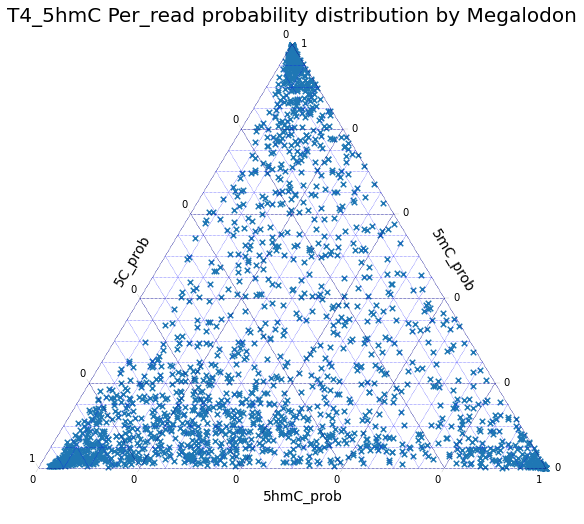

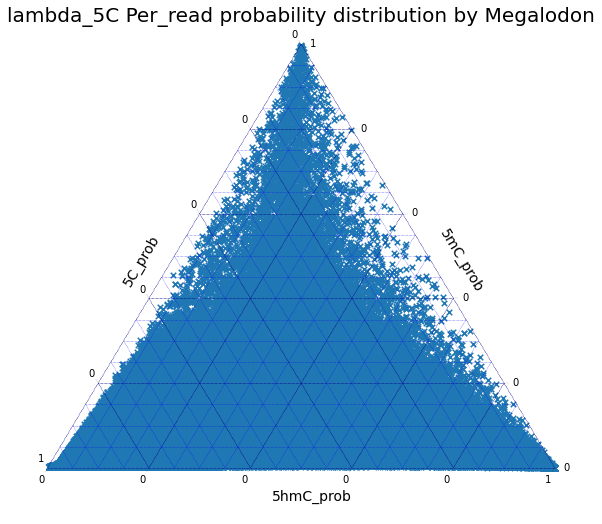

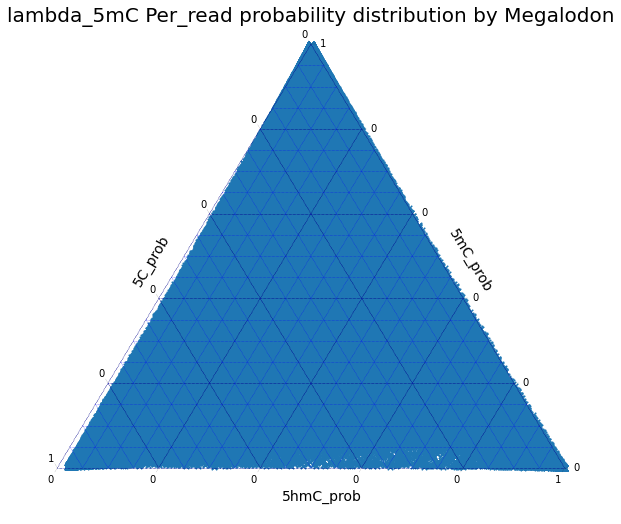

In [65]:
#T4
#Megalodon result
input_path='/fastscratch/c-panz/megalodon'
output_path=''
#df_T4=pd.read_csv(os.path.join(input_path, 'T4.Megalodon.per_read.prob.bed'), sep='\t')
methyl_prob_plotting(input_path, input_file='T4.Megalodon.per_read.prob.bed', prefix='T4_5hmC', output_path=output_path)
methyl_prob_plotting(input_path, input_file='lambda.Megalodon.per_read.prob.bed', prefix='lambda_5C', output_path=output_path)
methyl_prob_plotting(input_path, input_file='5mC_lambda.Megalodon.per_read.prob.bed', prefix='lambda_5mC', output_path=output_path)

## Per_site with different cut-off

In [149]:
input_path='/fastscratch/c-panz/2021-09-02'
cutoff=[x/10 for x in range(0, 11)]

In [146]:
#Draw the 5hmC_freq distribution
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
def methyl_freq_plotting(input_path, input_file, prefix, cutoff, output_path):
    #Plot points(marker pattern, size)
    df = pd.read_csv(os.path.join(input_path, input_file), sep='\t')
    x=df['5hmC_freq']*100
    binwidth=5
    kwargs = dict(alpha=1, bins=np.arange(0, 100+binwidth, binwidth),  ##Set up the x_axis
                  edgecolor='black', align='mid')
    plt.figure(figsize=(6,4), dpi=90)
    plt.gca().set(title='{} Histogram of 5hmC% by Megalodon(cutoff={})'.format(prefix, cutoff),
                  xlabel='%5hmC per base', ylabel='Frequency')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    
    if len(x) == 0:
        return None
        
    elif len(x) !=0:
        n, bins, _ = plt.hist(x=x, **kwargs)
    
        k = [round(i/len(x)*100, 1) for i in n]
        for i in range(0, len(n)):
            x_pos = bins[i] - 0.5
            y_pos = n[i] 
            label = str(k[i]) # relative frequency of each bin
            plt.gca().text(x_pos, y_pos, label, fontsize='small')
        
    fig_name = '{}.Megalodon.per_site.{}'.format(prefix,cutoff) + '.png'   
    plt.savefig(fname=os.path.join(output_path, fig_name), 
                    dpi=100, bbox_inches='tight', pad_inches=0.0, facecolor='w', transparent=False)

    plt.show()

0.0


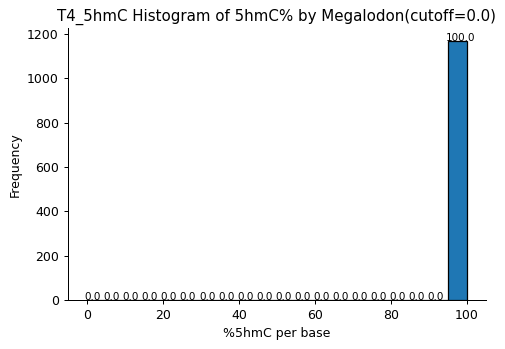

0.1


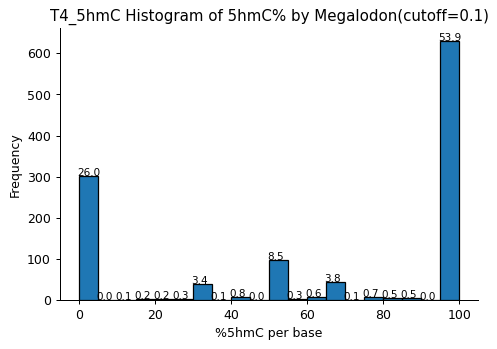

0.2


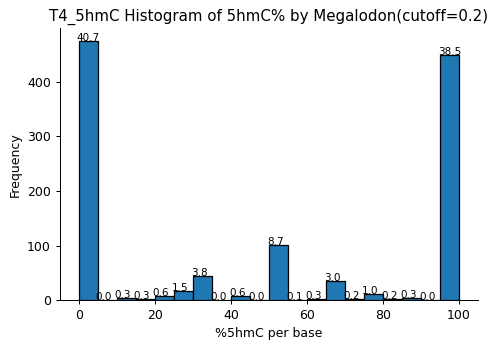

0.3


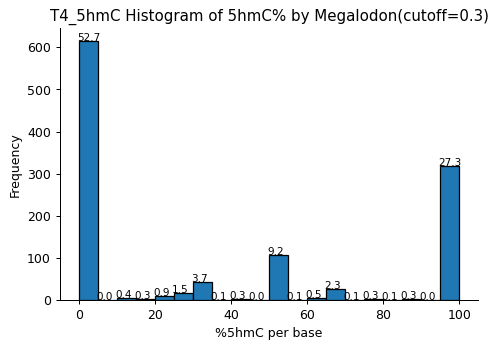

0.4


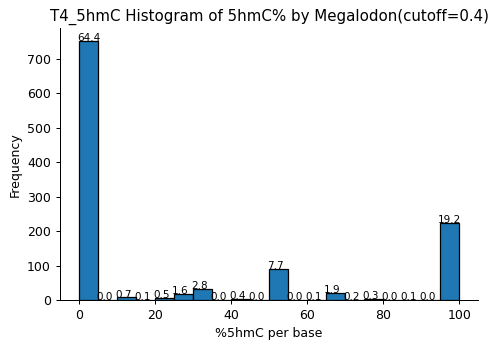

0.5


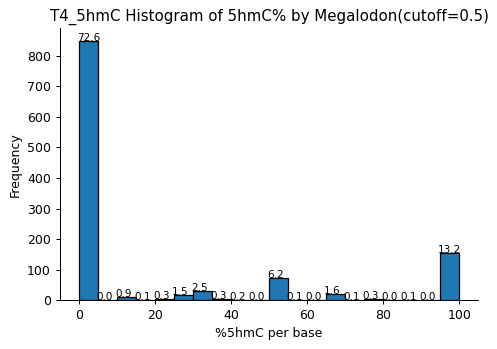

0.6
0.7


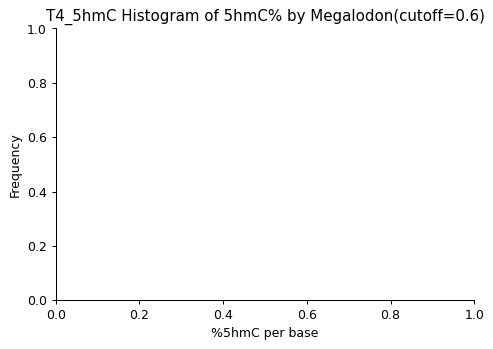

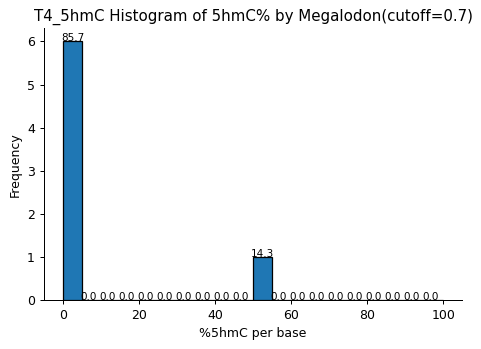

0.8


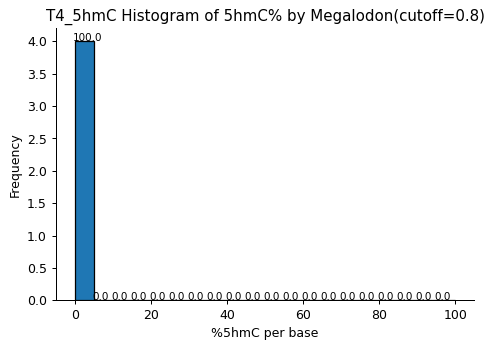

0.9
1.0
0.0


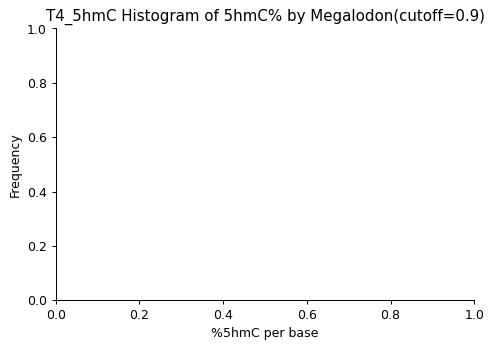

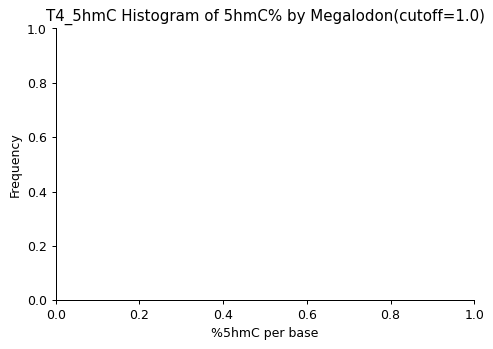

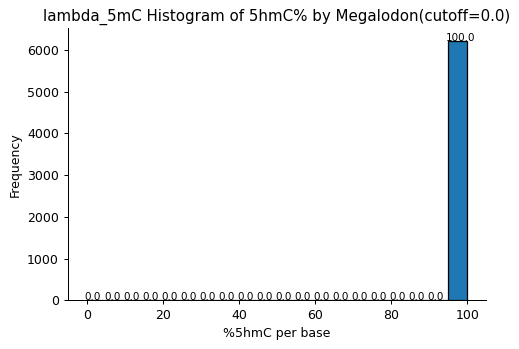

0.1


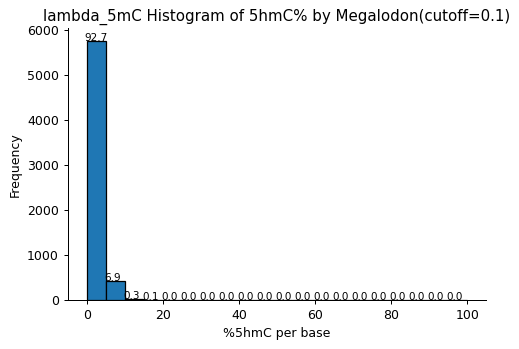

0.2


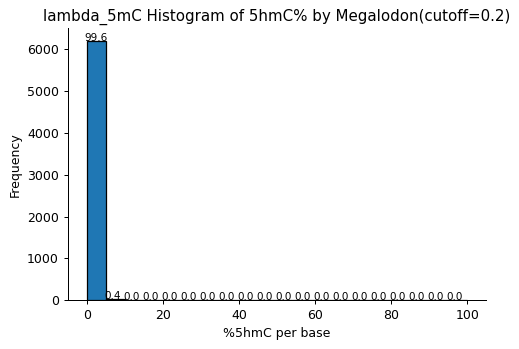

0.3


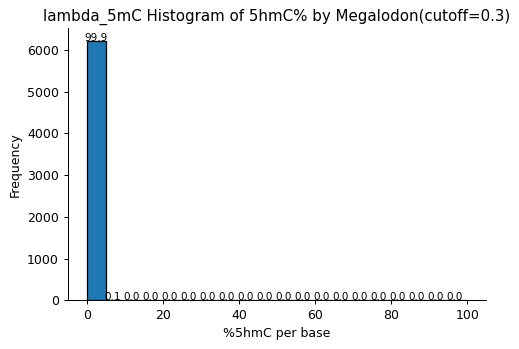

0.4


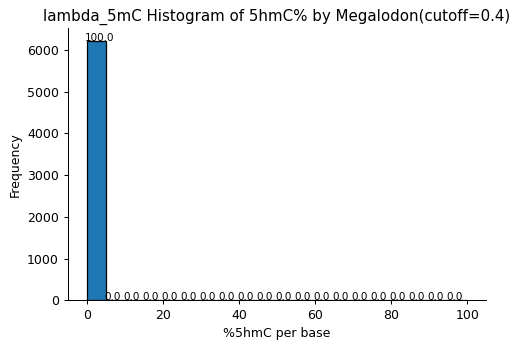

0.5


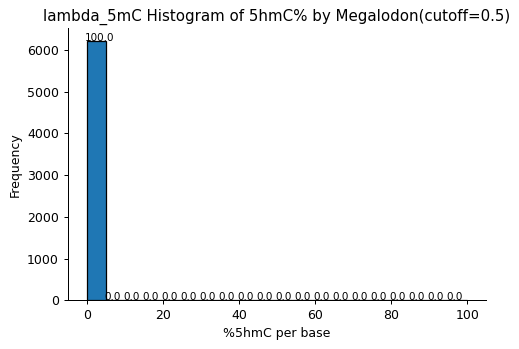

0.6


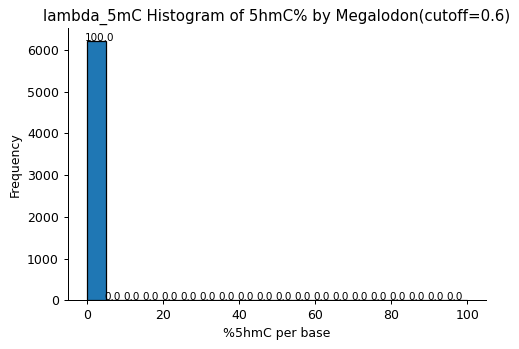

0.7


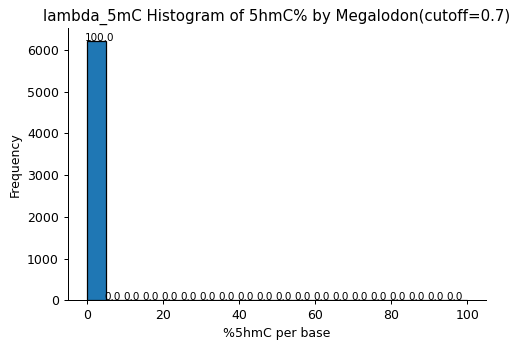

0.8


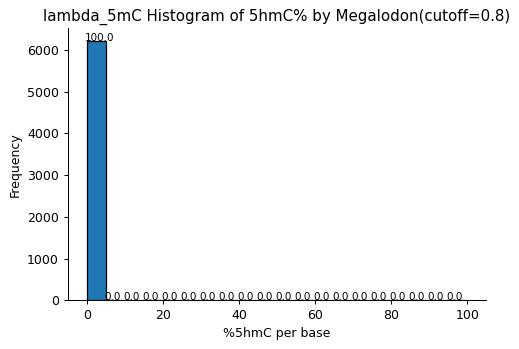

0.9


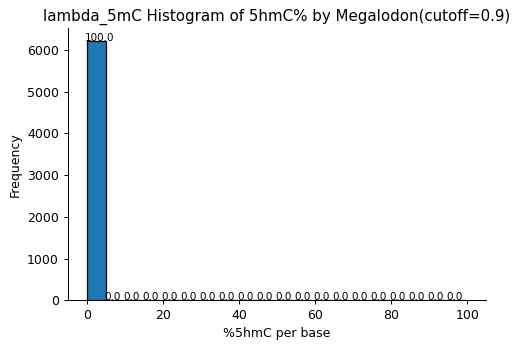

1.0
0.0


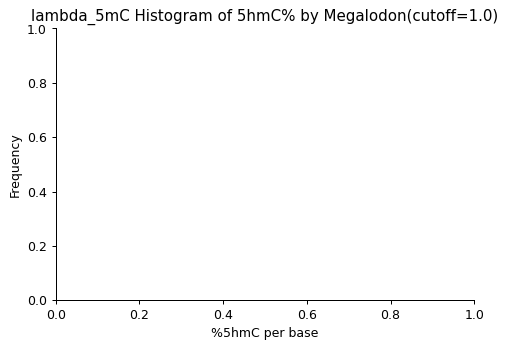

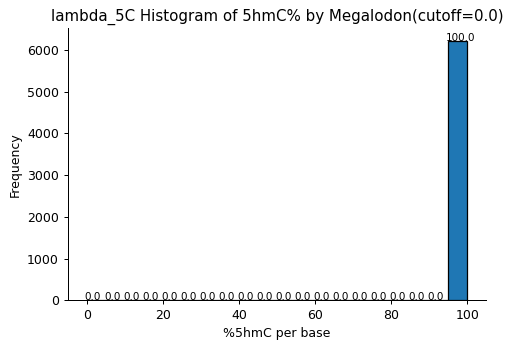

0.1


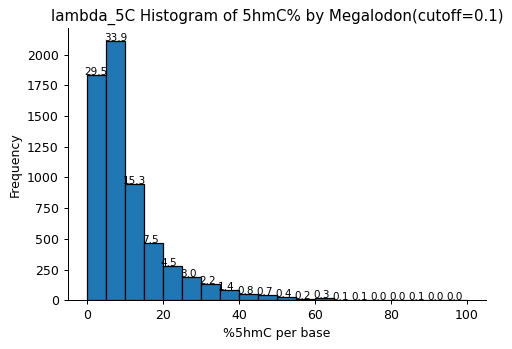

0.2


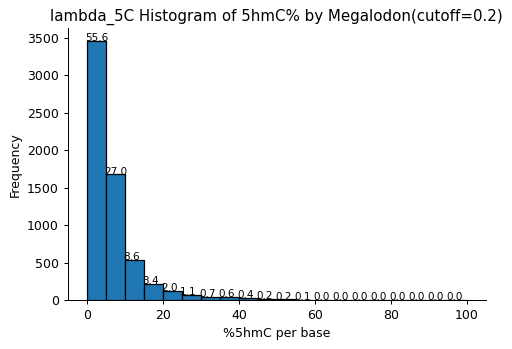

0.3


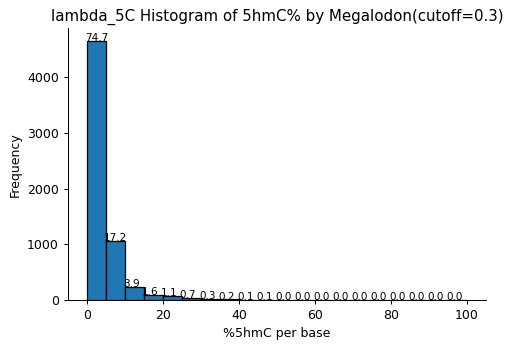

0.4


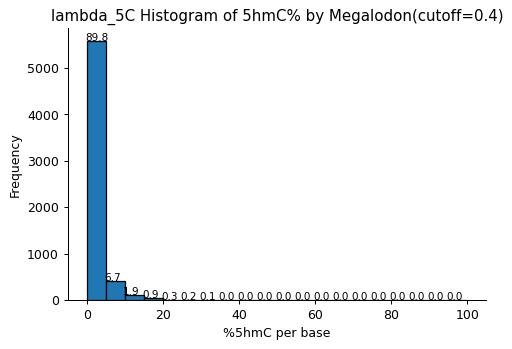

0.5


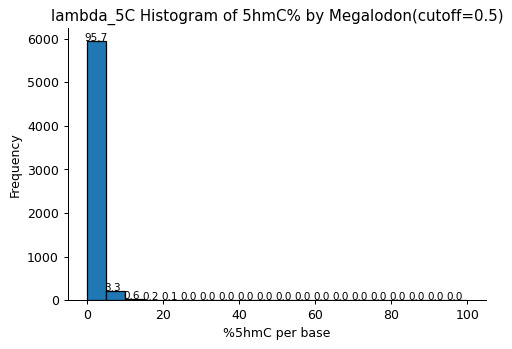

0.6


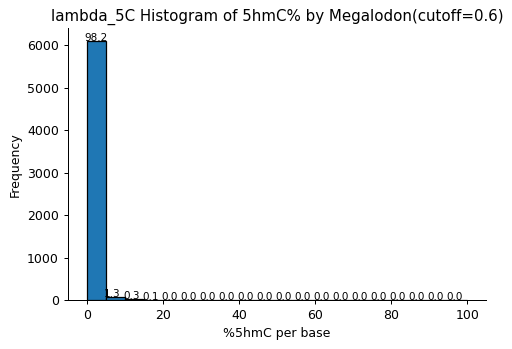

0.7


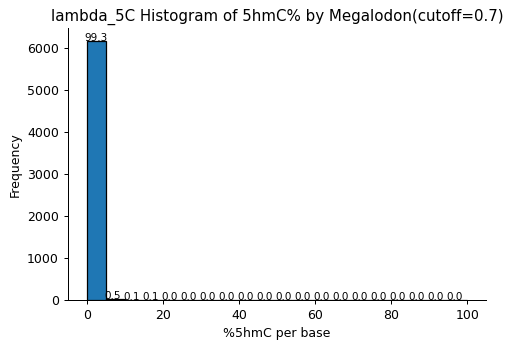

0.8


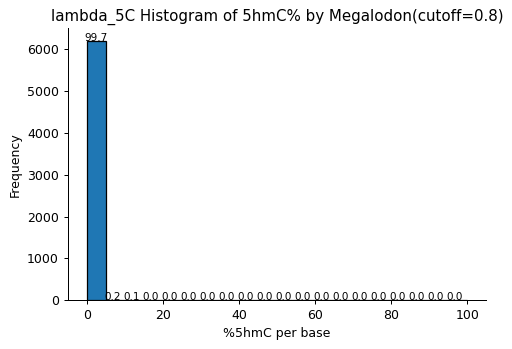

0.9


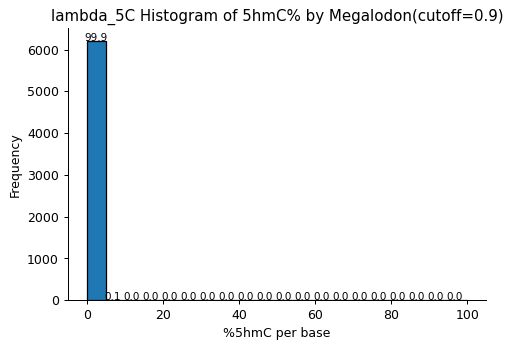

1.0


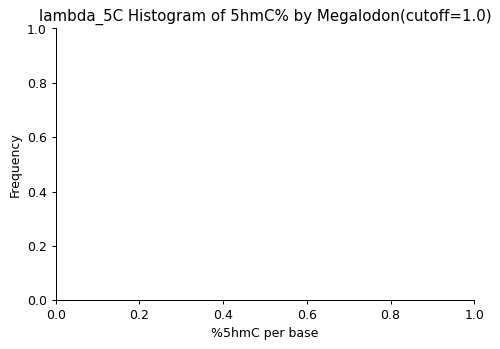

In [153]:
#T4
#Pre_read result: 5mC_lambda.Megalodon.per_site.0.1.tsv
prefix='T4_5hmC'
for i in cutoff:
    print(i)
    methyl_freq_plotting(input_path, input_file='T4.Megalodon.per_site.{}.tsv'.format(float(i)), prefix=prefix, cutoff=i, output_path=output_path)
    
    
#Lambda_5mC
prefix='lambda_5mC'
for i in cutoff:
    print(i)
    methyl_freq_plotting(input_path, input_file='5mC_lambda.Megalodon.per_site.{}.tsv'.format(float(i)), prefix=prefix, cutoff=i, output_path=output_path)

#Lambda_5C
prefix='lambda_5C'
for i in cutoff:
    print(i)
    methyl_freq_plotting(input_path, input_file='lambda.Megalodon.per_site.{}.tsv'.format(float(i)), prefix=prefix, cutoff=i, output_path=output_path)

0.0


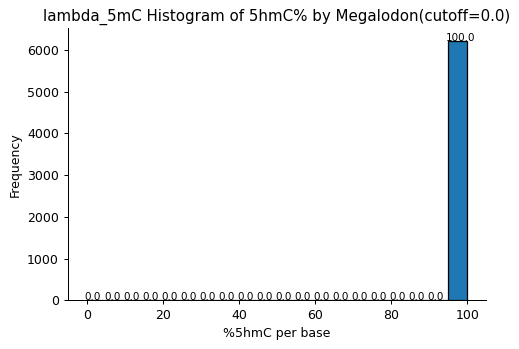

0.1


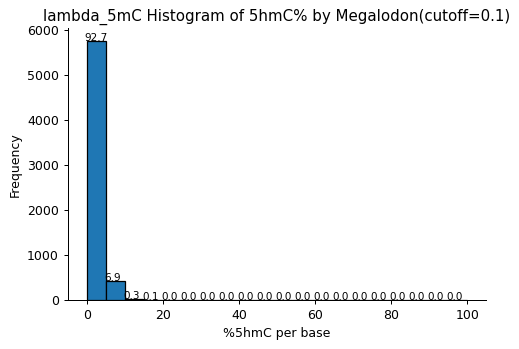

0.2


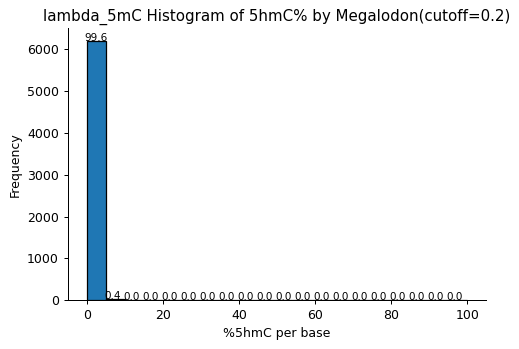

0.3


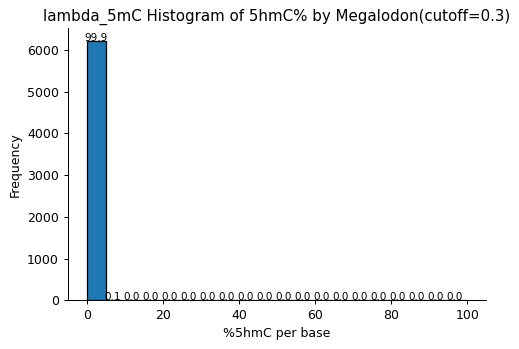

0.4


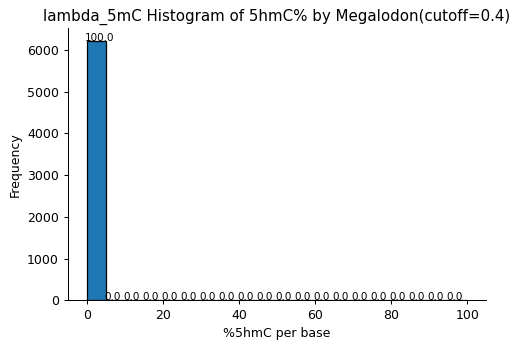

0.5


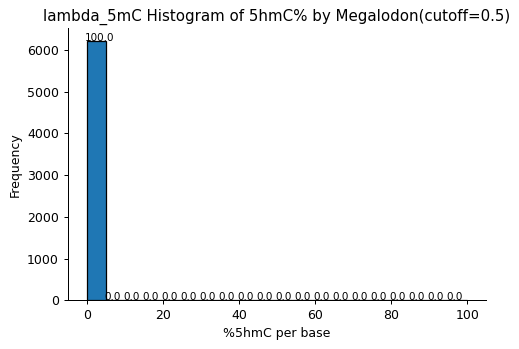

0.6


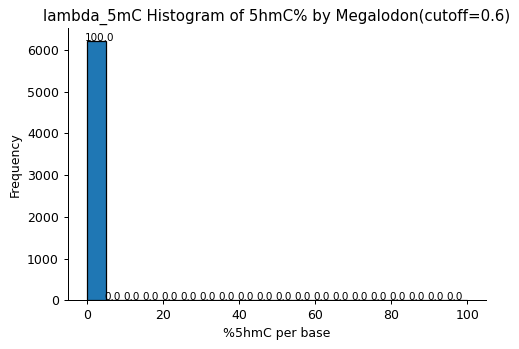

0.7


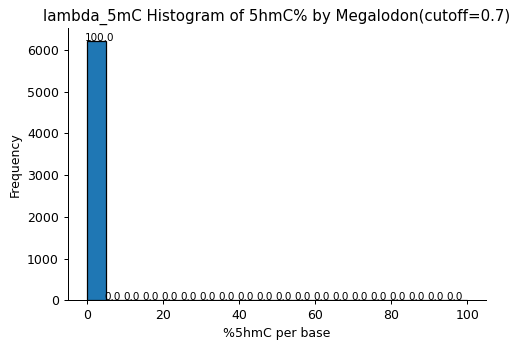

0.8


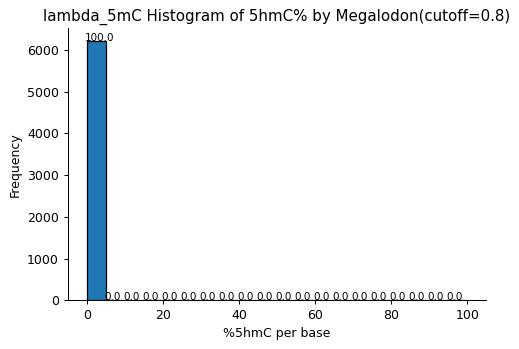

0.9


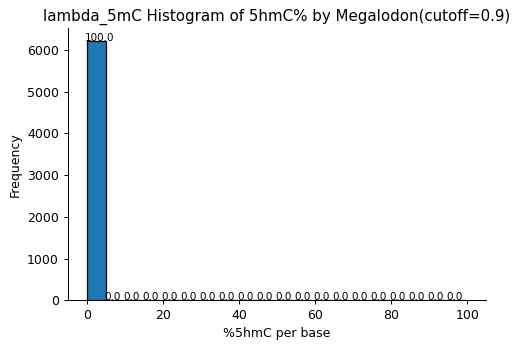

1.0


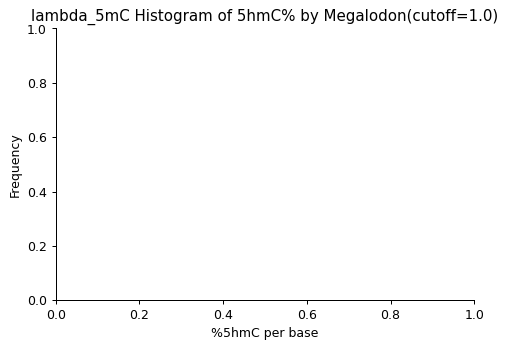

0.0


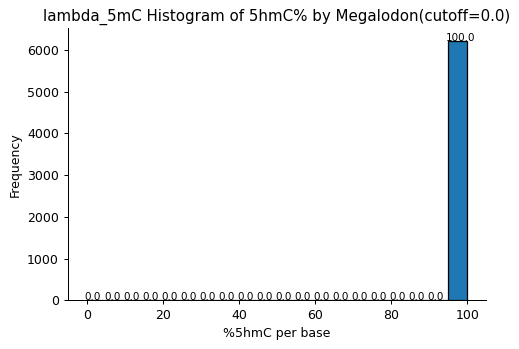

0.1


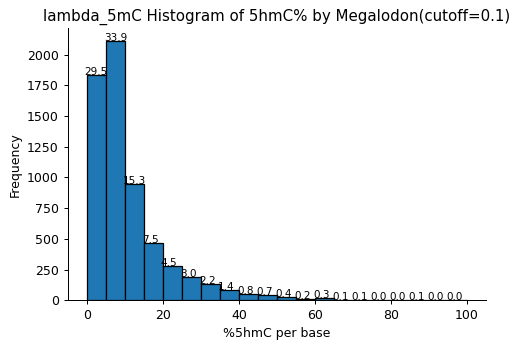

0.2


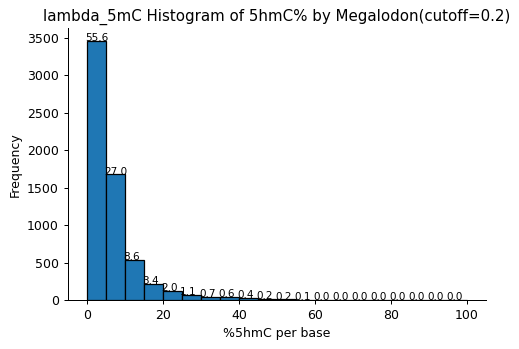

0.3


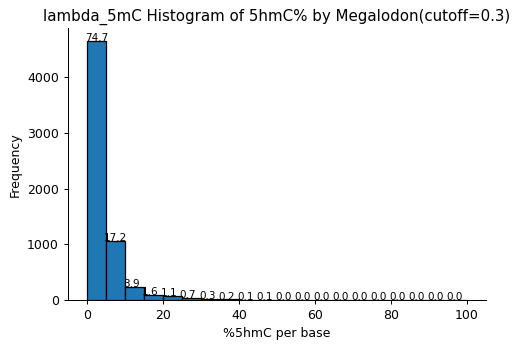

0.4


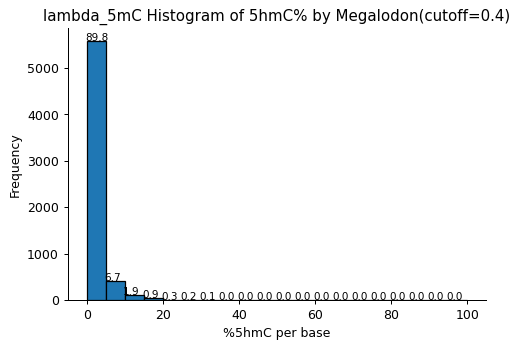

0.5


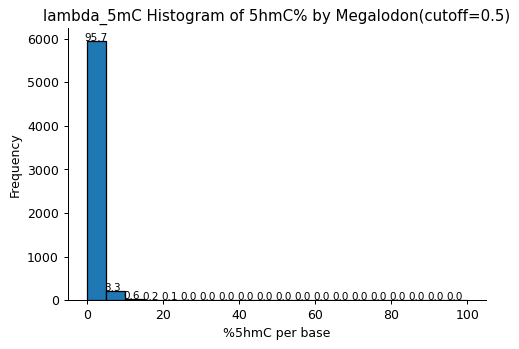

0.6


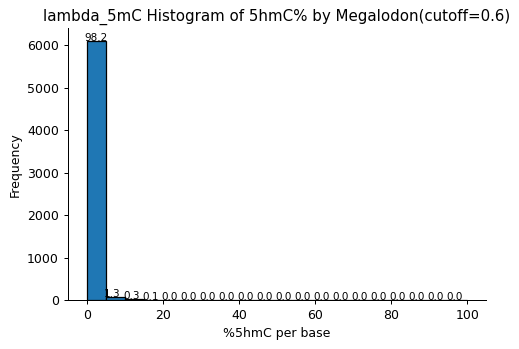

0.7


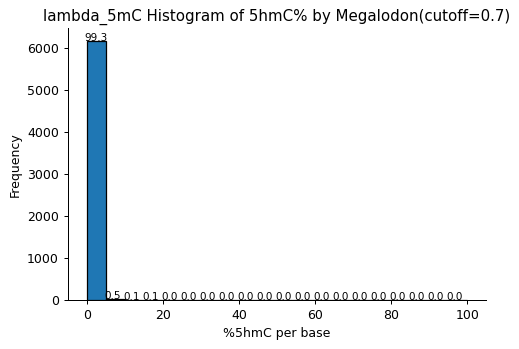

0.8


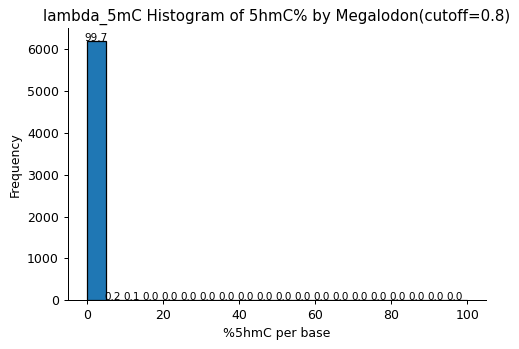

0.9


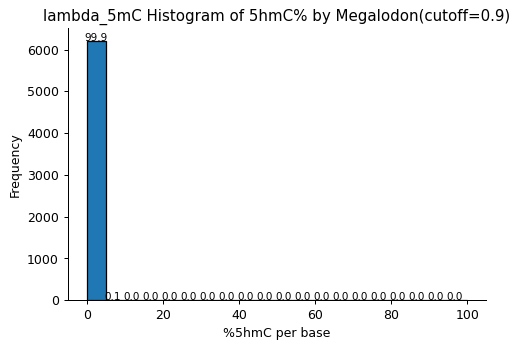

1.0


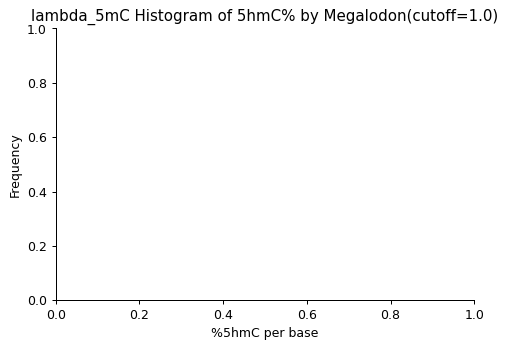

# 2021-08-31

# 1. Load the BSseq/oxBSseq result

In [32]:
#BSseq result
input_dir='/projects/li-lab/Ziwei/Nanopore/results/APL_megalodon2.3.3_guppy5.0.11'
df_BSseq = pd.read_csv(os.path.join(input_dir, 'APL.mlml.addstrand.bscov.oxbscov.selected.bed.gz'), 
                       compression='gzip',
                       names = ['chr','start','end','5mC%','5hmC%','5C%','number_of_conflict','strand','BS_cov','oxBS_cov'],
                       sep = '\t')
df_BSseq

,chr,start,end,5mC%,5hmC%,5C%,number_of_conflict,strand,BS_cov,oxBS_cov
0,chr1,10542,10543,1.00,0.00,0.00,0,+,2,1
1,chr1,10563,10564,0.75,0.00,0.25,0,+,3,1
2,chr1,10571,10572,1.00,0.00,0.00,0,+,3,1
3,chr1,10577,10578,1.00,0.00,0.00,0,+,3,2
4,chr1,10579,10580,1.00,0.00,0.00,0,+,3,2
...,...,...,...,...,...,...,...,...,...,...
44245797,chrY,56887100,56887101,0.75,0.25,0.00,0,-,1,4
44245798,chrY,56887580,56887581,1.00,0.00,0.00,0,+,2,1
44245799,chrY,56887582,56887583,0.00,0.00,1.00,0,+,2,1
44245800,chrY,56887701,56887702,1.00,0.00,0.00,0,+,1,1


BSseq has the difference between positive strand and negative strand

In [37]:
#Rank the BSseq result by 5hmC level
df = df_BSseq.copy()
df = df.round(6)
df = df.sort_values(['5hmC%'],ascending=False)
df=df.reset_index(drop=True)
#df.to_csv(os.path.join(input_dir,'APL.mlml.addstrand.bscov.oxbscov.5hmC_rank.bed'), header = True, sep='\t')

df = df_BSseq.copy()
df = df.round(6)
#Only find the sites that are 5hmC%=100% in APL BSseq/oxBSseq
df_5hmC=df[df['5hmC%']==1]
df_5hmC_positive = df[(df['5hmC%']==1) & (df['strand'] == "+")]
df_5hmC_negative = df[(df['5hmC%']==1) & (df['strand'] == "-")]

In [61]:
df_5hmC.shape

(496842, 10)

In [39]:
df_5hmC.tail(5)

,chr,start,end,5mC%,5hmC%,5C%,number_of_conflict,strand,BS_cov,oxBS_cov
44244829,chrY,56826592,56826593,0.0,1.0,0.0,0,+,1,1
44244837,chrY,56826667,56826668,0.0,1.0,0.0,0,+,4,2
44244920,chrY,56828703,56828704,0.0,1.0,0.0,0,+,1,1
44245710,chrY,56882525,56882526,0.0,1.0,0.0,0,-,1,5
44245721,chrY,56883092,56883093,0.0,1.0,0.0,0,-,1,4


In [40]:
#Load the Megalodon result
input_dir='/fastscratch/c-panz/APL'
df_APL = pd.read_csv(os.path.join(input_dir, 'APL.per_read.prob.sorted.trimed.bed'), sep = '\t')
df_APL

,chr,start,read_id,strand,5hmC_prob,5mC_prob,5C_prob
0,chr1,10469,c12dc98b-4382-4762-853d-b3948eab565e,-,0.005698,0.988540,0.005762
1,chr1,10471,c12dc98b-4382-4762-853d-b3948eab565e,-,0.008271,0.963133,0.028597
2,chr1,10484,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000274,0.998628,0.001098
3,chr1,10489,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000095,0.999435,0.000470
4,chr1,10493,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000091,0.999589,0.000319
...,...,...,...,...,...,...,...
72432591,chrY,56887581,44f84789-5c7e-4f79-bd0e-0e13f11d2536,+,0.021479,0.005722,0.972800
72432592,chrY,56887582,a5edfd66-8ba8-4c66-aa9f-d4458684c151,-,0.329859,0.332551,0.337590
72432593,chrY,56887700,0a2e8d56-b369-4b8b-889f-156c41c7df31,+,0.024644,0.003062,0.972294
72432594,chrY,56887700,44f84789-5c7e-4f79-bd0e-0e13f11d2536,+,0.047172,0.891371,0.061457


Megalodon result is 1-based, the start site = C site

In [59]:
#Correct the start position in negative strand in Megalodon
#If negative strand, start = start + 1
#Reference: https://stackoverflow.com/a/19226617
df_APL = df_APL.copy()
df_APL.loc[df['strand']=='-', 'start'] =df_APL['start']+1
df_APL

,chr,start,read_id,strand,5hmC_prob,5mC_prob,5C_prob
0,chr1,10477,c12dc98b-4382-4762-853d-b3948eab565e,-,0.005698,0.988540,0.005762
1,chr1,10479,c12dc98b-4382-4762-853d-b3948eab565e,-,0.008271,0.963133,0.028597
2,chr1,10492,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000274,0.998628,0.001098
3,chr1,10497,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000095,0.999435,0.000470
4,chr1,10501,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000091,0.999589,0.000319
...,...,...,...,...,...,...,...
72432591,chrY,56887581,44f84789-5c7e-4f79-bd0e-0e13f11d2536,+,0.021479,0.005722,0.972800
72432592,chrY,56887583,a5edfd66-8ba8-4c66-aa9f-d4458684c151,-,0.329859,0.332551,0.337590
72432593,chrY,56887700,0a2e8d56-b369-4b8b-889f-156c41c7df31,+,0.024644,0.003062,0.972294
72432594,chrY,56887700,44f84789-5c7e-4f79-bd0e-0e13f11d2536,+,0.047172,0.891371,0.061457


## Compare the 100% 5hmC result with Megalodon result

In [60]:
# join the two, keeping only overlapped rows
df_joined = pd.merge(df_5hmC, df_APL, on=['chr','start'], how='inner')
df_joined

,chr,start,end,5mC%,5hmC%,5C%,number_of_conflict,strand_x,BS_cov,oxBS_cov,read_id,strand_y,5hmC_prob,5mC_prob,5C_prob
0,chr1,51797,51798,0.0,1.0,0.0,0,-,3,1,710d17ab-dbfe-41ec-8ebe-45f525fbd175,-,0.022924,0.921884,0.055192
1,chr1,51797,51798,0.0,1.0,0.0,0,-,3,1,dd0068c2-f773-4bb8-85bf-1ee458dd5d87,-,0.000272,0.998424,0.001304
2,chr1,89360,89361,0.0,1.0,0.0,0,-,1,1,a22c7453-13a9-4048-9785-962fd501835f,-,0.226469,0.475281,0.298250
3,chr1,91060,91061,0.0,1.0,0.0,0,-,3,1,a22c7453-13a9-4048-9785-962fd501835f,-,0.004224,0.985130,0.010646
4,chr1,119691,119692,0.0,1.0,0.0,0,-,1,1,23e06d33-6d3f-482a-989b-3bfe75400da6,-,0.000141,0.999298,0.000561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304712,chrY,56882525,56882526,0.0,1.0,0.0,0,-,1,5,9ebfb8c5-7627-4dec-a863-0d3ecca499a1,-,0.032551,0.013141,0.954307
304713,chrY,56882525,56882526,0.0,1.0,0.0,0,-,1,5,ba5fb67b-eb0e-417b-a514-2da8bbb42958,-,0.019278,0.004485,0.976237
304714,chrY,56883092,56883093,0.0,1.0,0.0,0,-,1,4,3ed5e2bc-ce0e-48a5-b93e-fc437dbe66e3,-,0.028073,0.930838,0.041089
304715,chrY,56883092,56883093,0.0,1.0,0.0,0,-,1,4,9ebfb8c5-7627-4dec-a863-0d3ecca499a1,-,0.077208,0.877969,0.044823


In [67]:
df_joined_select = df_joined[['chr','start','end','read_id','5hmC_prob','5mC_prob','5C_prob','strand_y']]
df_joined_select.columns=['chr','start','end','read_id','5hmC_prob','5mC_prob','5C_prob', 'strand']
df_joined_select=df_joined_select[['chr','start','end','read_id','strand','5hmC_prob','5mC_prob','5C_prob']]
df_joined_select

,chr,start,end,read_id,strand,5hmC_prob,5mC_prob,5C_prob
0,chr1,51797,51798,710d17ab-dbfe-41ec-8ebe-45f525fbd175,-,0.022924,0.921884,0.055192
1,chr1,51797,51798,dd0068c2-f773-4bb8-85bf-1ee458dd5d87,-,0.000272,0.998424,0.001304
2,chr1,89360,89361,a22c7453-13a9-4048-9785-962fd501835f,-,0.226469,0.475281,0.298250
3,chr1,91060,91061,a22c7453-13a9-4048-9785-962fd501835f,-,0.004224,0.985130,0.010646
4,chr1,119691,119692,23e06d33-6d3f-482a-989b-3bfe75400da6,-,0.000141,0.999298,0.000561
...,...,...,...,...,...,...,...,...
304712,chrY,56882525,56882526,9ebfb8c5-7627-4dec-a863-0d3ecca499a1,-,0.032551,0.013141,0.954307
304713,chrY,56882525,56882526,ba5fb67b-eb0e-417b-a514-2da8bbb42958,-,0.019278,0.004485,0.976237
304714,chrY,56883092,56883093,3ed5e2bc-ce0e-48a5-b93e-fc437dbe66e3,-,0.028073,0.930838,0.041089
304715,chrY,56883092,56883093,9ebfb8c5-7627-4dec-a863-0d3ecca499a1,-,0.077208,0.877969,0.044823


In [68]:
df_joined_select.to_csv('/fastscratch/c-panz/APL/APL.5hmC_100.Megalodon.per_read.bed', header=None, sep='\t', index = None)

In [69]:
# Only consider 100% 5hmC sites in Megalodon results
import os
import sys
import pandas as pd
import numpy as np

threshold=0.8

## Convert into 2-way classifer: 5hmC vs non_5hmC

In [72]:
#For a specific site in a read, label the site as 5hmC (cut-off > 0.8) or non_5hmC (cut_off < 0.2)
class SiteStats:
    def __init__(self, chrom, strand, start, end):
        self._chrom = chrom
        self._strand = strand
        self._start = start
        self._end = end
        
        self.coverage = 0
        self.hydroxymethyl = 0
        self.unhydroxymethyl = 0

cpgDict = dict()  

with open('/fastscratch/c-panz/APL/APL.5hmC_100.Megalodon.per_read.bed') as rf:
    for line in rf:
        record = line.strip().split("\t")
        chrom = record[0]
        start = int(record[1])
        end = int(record[2]) 
        strand=record[4]
        hydroxymethyl_prob = float(record[5])
#        methyl_prob = float(record[6]) 
#        unmethyl_prob=float(record[7])

        if strand not in ['-', '+']:
            raise Exception(f'The file can not recognized strand-info, please check it')    
                 
        site_key = (chrom, start, end, strand)
        if site_key not in cpgDict:
            cpgDict[site_key] = SiteStats(chrom, strand, start, end)
            
        if hydroxymethyl_prob > threshold: ##Count hydroxymethylated reads
            cpgDict[site_key].hydroxymethyl += 1
            cpgDict[site_key].coverage += 1
        elif hydroxymethyl_prob < 1-threshold:  ##Count unmethylated reads
            cpgDict[site_key].unhydroxymethyl += 1
            cpgDict[site_key].coverage += 1
        else:  ## Neglect other cases
            continue   
    
sorted_keys = sorted(list(cpgDict.keys()), key = lambda x: x)
with open('/fastscratch/c-panz/APL/APL.5hmC_100.Megalodon.5hmC.per_site.bed', 'w') as result:
        result.write('\t'.join(["chrom", "start", "end", "strand", 
                                "5hmC_cov", "non_5hmC_cov", "cov", 
                                "5hmC_freq", "non_5hmC_freq"]) + '\n')
        for key in sorted_keys: 
            cpg_state = cpgDict[key]
            assert(cpg_state.coverage == (cpg_state.hydroxymethyl + cpg_state.unhydroxymethyl))
            if cpg_state.coverage > 0:
                f_hydroxymethyl = float(cpg_state.hydroxymethyl) / cpg_state.coverage
                f_unhydroxymethyl = float(cpg_state.unhydroxymethyl) / cpg_state.coverage

                result.write("%s\t%s\t%s\t%s\t%d\t%d\t%d\t%.3f\t%.3f\n" % (cpg_state._chrom, cpg_state._start, cpg_state._end, cpg_state._strand, 
                                                                           cpg_state.hydroxymethyl, cpg_state.unhydroxymethyl,
                                                                           cpg_state.coverage, f_hydroxymethyl, f_unhydroxymethyl))

In [73]:
df = pd.read_csv('/fastscratch/c-panz/APL/APL.5hmC_100.Megalodon.5hmC.per_site.bed', sep = '\t')
df

,chrom,start,end,strand,5hmC_cov,non_5hmC_cov,cov,5hmC_freq,non_5hmC_freq
0,chr1,51797,51798,-,0,2,2,0.0,1.0
1,chr1,91060,91061,-,0,1,1,0.0,1.0
2,chr1,119691,119692,-,0,3,3,0.0,1.0
3,chr1,137336,137337,-,0,2,2,0.0,1.0
4,chr1,137956,137957,-,0,2,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...
159094,chrY,56743952,56743953,-,0,52,52,0.0,1.0
159095,chrY,56754634,56754635,-,0,66,66,0.0,1.0
159096,chrY,56768390,56768391,-,0,101,101,0.0,1.0
159097,chrY,56882525,56882526,-,0,2,2,0.0,1.0


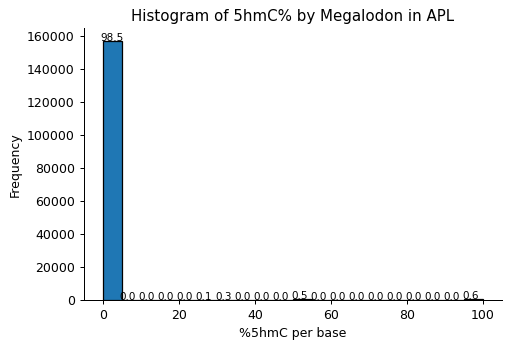

In [74]:
#Draw the 5hmC_freq distribution
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Methylation frequencies distribution
x=df['5hmC_freq']*100
binwidth=5
kwargs = dict(alpha=1, bins=np.arange(0, 100+binwidth, binwidth),  ##Set up the x_axis
              edgecolor='black', align='mid')
plt.figure(figsize=(6,4), dpi=90)
plt.gca().set(title='Histogram of 5hmC% by Megalodon in APL',
              xlabel='%5hmC per base', ylabel='Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
    
n, bins, _ = plt.hist(x=x, **kwargs)
    
k = [round(i/len(x)*100, 1) for i in n]
for i in range(0, len(n)):
    x_pos = bins[i] - 0.5
    y_pos = n[i] + 20
    label = str(k[i]) # relative frequency of each bin
    plt.gca().text(x_pos, y_pos, label, fontsize='small')
        
plt.show()

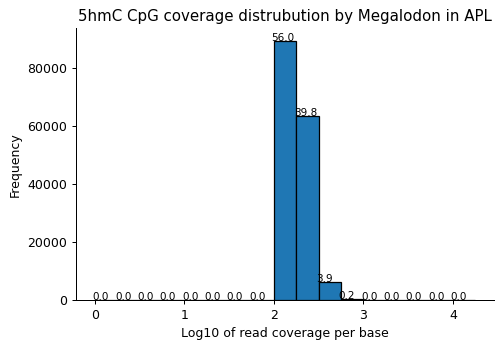

In [80]:
## Draw 5hmC Read coverage distribution
x=df['cov']*100

binwidth=0.25
x= x.astype(float)
x = np.log10(x)
kwargs = dict(alpha=1, bins=np.arange(0, x.max()+binwidth, binwidth),  ##Set up the x_axis
              edgecolor='black', align='mid')
plt.figure(figsize=(6,4), dpi=90)
plt.gca().set(title='5hmC CpG coverage distrubution by Megalodon in APL',
              xlabel='Log10 of read coverage per base',
              ylabel='Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

n, bins, _ = plt.hist(x, **kwargs)
    
k = [round(i/len(x)*100, 1) for i in n]
for i in range(0, len(n)):
    x_pos = bins[i] - binwidth/10
    y_pos = n[i] + 40 ## Determine percentage position
    label = str(k[i]) # relative frequency of each bin
    plt.gca().text(x_pos, y_pos, label, fontsize='small')
        
plt.show()

## Convert into 2-way classifer: 5mC vs non_5mC

In [75]:
#For a specific site in a read, label the site as 5mC (cut-off > 0.8) or non_5mC (cut_off < 0.2)
class SiteStats:
    def __init__(self, chrom, strand, start, end):
        self._chrom = chrom
        self._strand = strand
        self._start = start
        self._end = end
        
        self.coverage = 0
        self.methyl = 0
        self.unmethyl = 0

cpgDict = dict()  

with open('/fastscratch/c-panz/APL/APL.5hmC_100.Megalodon.per_read.bed') as rf:
    for line in rf:
        record = line.strip().split("\t")
        chrom = record[0]
        start = int(record[1])
        end = int(record[2]) 
        strand=record[4]
#        hydroxymethyl_prob = float(record[5])
        methyl_prob = float(record[6]) 
#        unmethyl_prob=float(record[7])

        if strand not in ['-', '+']:
            raise Exception(f'The file can not recognized strand-info, please check it')    
                 
        site_key = (chrom, start, end, strand)
        if site_key not in cpgDict:
            cpgDict[site_key] = SiteStats(chrom, strand, start, end)
            
        if methyl_prob > threshold: ##Count hydroxymethylated reads
            cpgDict[site_key].methyl += 1
            cpgDict[site_key].coverage += 1
        elif methyl_prob < 1-threshold:  ##Count unmethylated reads
            cpgDict[site_key].unmethyl += 1
            cpgDict[site_key].coverage += 1
        else:  ## Neglect other cases
            continue   
    
sorted_keys = sorted(list(cpgDict.keys()), key = lambda x: x)
with open('/fastscratch/c-panz/APL/APL.5hmC_100.Megalodon.5mC.per_site.bed', 'w') as result:
        result.write('\t'.join(["chrom", "start", "end", "strand", 
                                "5mC_cov", "non_5mC_cov", "cov", 
                                "5mC_freq", "non_5mC_freq"]) + '\n')
        for key in sorted_keys: 
            cpg_state = cpgDict[key]
            assert(cpg_state.coverage == (cpg_state.methyl + cpg_state.unmethyl))
            if cpg_state.coverage > 0:
                f_methyl = float(cpg_state.methyl) / cpg_state.coverage
                f_unmethyl = float(cpg_state.unmethyl) / cpg_state.coverage

                result.write("%s\t%s\t%s\t%s\t%d\t%d\t%d\t%.3f\t%.3f\n" % (cpg_state._chrom, cpg_state._start, cpg_state._end, cpg_state._strand, 
                                                                           cpg_state.methyl, cpg_state.unmethyl,
                                                                           cpg_state.coverage, f_methyl, f_unmethyl))

In [76]:
df_5mC = pd.read_csv('/fastscratch/c-panz/APL/APL.5hmC_100.Megalodon.5mC.per_site.bed', sep = '\t')
df_5mC

,chrom,start,end,strand,5mC_cov,non_5mC_cov,cov,5mC_freq,non_5mC_freq
0,chr1,51797,51798,-,2,0,2,1.000,0.000
1,chr1,91060,91061,-,1,0,1,1.000,0.000
2,chr1,119691,119692,-,3,0,3,1.000,0.000
3,chr1,137336,137337,-,2,0,2,1.000,0.000
4,chr1,137956,137957,-,2,0,2,1.000,0.000
...,...,...,...,...,...,...,...,...,...
157808,chrY,56743952,56743953,-,50,3,53,0.943,0.057
157809,chrY,56754634,56754635,-,39,24,63,0.619,0.381
157810,chrY,56768390,56768391,-,95,7,102,0.931,0.069
157811,chrY,56882525,56882526,-,0,2,2,0.000,1.000


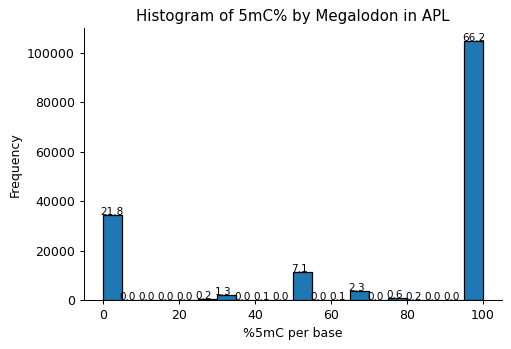

In [77]:
#Draw the 5mC_freq distribution
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Methylation frequencies distribution
x=df_5mC['5mC_freq']*100
binwidth=5
kwargs = dict(alpha=1, bins=np.arange(0, 100+binwidth, binwidth),  ##Set up the x_axis
              edgecolor='black', align='mid')
plt.figure(figsize=(6,4), dpi=90)
plt.gca().set(title='Histogram of 5mC% by Megalodon in APL',
              xlabel='%5mC per base', ylabel='Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
    
n, bins, _ = plt.hist(x=x, **kwargs)
    
k = [round(i/len(x)*100, 1) for i in n]
for i in range(0, len(n)):
    x_pos = bins[i] - 0.5
    y_pos = n[i] + 20
    label = str(k[i]) # relative frequency of each bin
    plt.gca().text(x_pos, y_pos, label, fontsize='small')
        
plt.show()

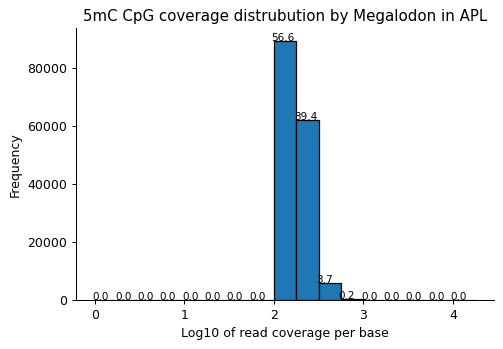

In [82]:
## Draw 5mC Read coverage distribution
x=df_5mC['cov']*100

binwidth=0.25
x= x.astype(float)
x = np.log10(x)
kwargs = dict(alpha=1, bins=np.arange(0, x.max()+binwidth, binwidth),  ##Set up the x_axis
              edgecolor='black', align='mid')
plt.figure(figsize=(6,4), dpi=90)
plt.gca().set(title='5mC CpG coverage distrubution by Megalodon in APL',
              xlabel='Log10 of read coverage per base',
              ylabel='Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

n, bins, _ = plt.hist(x, **kwargs)
    
k = [round(i/len(x)*100, 1) for i in n]
for i in range(0, len(n)):
    x_pos = bins[i] - binwidth/10
    y_pos = n[i] + 40 ## Determine percentage position
    label = str(k[i]) # relative frequency of each bin
    plt.gca().text(x_pos, y_pos, label, fontsize='small')
        
plt.show()

# Find the 5mC%=100% in BSseq/oxBSseq

In [111]:
#Rank the BSseq result by 5hmC level
#BSseq result
input_dir='/projects/li-lab/Ziwei/Nanopore/results/APL_megalodon2.3.3_guppy5.0.11'
df_BSseq = pd.read_csv(os.path.join(input_dir, 'APL.mlml.addstrand.bscov.oxbscov.selected.bed.gz'), 
                       compression='gzip',
                       names = ['chr','start','end','5mC%','5hmC%','5C%','number_of_conflict','strand','BS_cov','oxBS_cov'],
                       sep = '\t')

df = df_BSseq.copy()
df = df.round(6)
#Only find the sites that are 5hmC%=100% in APL BSseq/oxBSseq
df_5mC=df[df['5mC%']==1]
df_5mC

,chr,start,end,5mC%,5hmC%,5C%,number_of_conflict,strand,BS_cov,oxBS_cov
0,chr1,10542,10543,1.0,0.0,0.0,0,+,2,1
2,chr1,10571,10572,1.0,0.0,0.0,0,+,3,1
3,chr1,10577,10578,1.0,0.0,0.0,0,+,3,2
4,chr1,10579,10580,1.0,0.0,0.0,0,+,3,2
5,chr1,10589,10590,1.0,0.0,0.0,0,+,3,2
...,...,...,...,...,...,...,...,...,...,...
44245795,chrY,56887090,56887091,1.0,0.0,0.0,0,-,1,6
44245796,chrY,56887099,56887100,1.0,0.0,0.0,0,+,6,1
44245798,chrY,56887580,56887581,1.0,0.0,0.0,0,+,2,1
44245800,chrY,56887701,56887702,1.0,0.0,0.0,0,+,1,1


In [121]:
df_5mC

,chr,start,end,5mC%,5hmC%,5C%,number_of_conflict,strand,BS_cov,oxBS_cov
0,chr1,10542,10543,1.0,0.0,0.0,0,+,2,1
2,chr1,10571,10572,1.0,0.0,0.0,0,+,3,1
3,chr1,10577,10578,1.0,0.0,0.0,0,+,3,2
4,chr1,10579,10580,1.0,0.0,0.0,0,+,3,2
5,chr1,10589,10590,1.0,0.0,0.0,0,+,3,2
...,...,...,...,...,...,...,...,...,...,...
44245795,chrY,56887090,56887091,1.0,0.0,0.0,0,-,1,6
44245796,chrY,56887099,56887100,1.0,0.0,0.0,0,+,6,1
44245798,chrY,56887580,56887581,1.0,0.0,0.0,0,+,2,1
44245800,chrY,56887701,56887702,1.0,0.0,0.0,0,+,1,1


In [123]:
#Load the Megalodon result
input_dir='/fastscratch/c-panz/APL'
df_APL = pd.read_csv(os.path.join(input_dir, 'APL.per_read.prob.sorted.trimed.bed'), sep = '\t')

#Correct the start position in negative strand in Megalodon
#If negative strand, start = start + 1
#Reference: https://stackoverflow.com/a/19226617
df = df_APL.copy()
df.loc[df['strand']=='-', 'start'] =df['start']+1
df

,chr,start,read_id,strand,5hmC_prob,5mC_prob,5C_prob
0,chr1,10470,c12dc98b-4382-4762-853d-b3948eab565e,-,0.005698,0.988540,0.005762
1,chr1,10472,c12dc98b-4382-4762-853d-b3948eab565e,-,0.008271,0.963133,0.028597
2,chr1,10485,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000274,0.998628,0.001098
3,chr1,10490,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000095,0.999435,0.000470
4,chr1,10494,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000091,0.999589,0.000319
...,...,...,...,...,...,...,...
72432591,chrY,56887581,44f84789-5c7e-4f79-bd0e-0e13f11d2536,+,0.021479,0.005722,0.972800
72432592,chrY,56887583,a5edfd66-8ba8-4c66-aa9f-d4458684c151,-,0.329859,0.332551,0.337590
72432593,chrY,56887700,0a2e8d56-b369-4b8b-889f-156c41c7df31,+,0.024644,0.003062,0.972294
72432594,chrY,56887700,44f84789-5c7e-4f79-bd0e-0e13f11d2536,+,0.047172,0.891371,0.061457


In [124]:
#Join the 5mC%=100%, keeping only overlapped rows
df_joined = pd.merge(df_5mC, df, on=['chr','start'], how='inner')
df_joined_select.to_csv('/fastscratch/c-panz/APL/APL.5mC_100.Megalodon.per_read.bed', header=None, sep='\t', index = None)

In [125]:
df_joined_select

,chr,start,end,read_id,strand,5hmC_prob,5mC_prob,5C_prob
0,chr1,51797,51798,710d17ab-dbfe-41ec-8ebe-45f525fbd175,-,0.022924,0.921884,0.055192
1,chr1,51797,51798,dd0068c2-f773-4bb8-85bf-1ee458dd5d87,-,0.000272,0.998424,0.001304
2,chr1,89360,89361,a22c7453-13a9-4048-9785-962fd501835f,-,0.226469,0.475281,0.298250
3,chr1,91060,91061,a22c7453-13a9-4048-9785-962fd501835f,-,0.004224,0.985130,0.010646
4,chr1,119691,119692,23e06d33-6d3f-482a-989b-3bfe75400da6,-,0.000141,0.999298,0.000561
...,...,...,...,...,...,...,...,...
304712,chrY,56882525,56882526,9ebfb8c5-7627-4dec-a863-0d3ecca499a1,-,0.032551,0.013141,0.954307
304713,chrY,56882525,56882526,ba5fb67b-eb0e-417b-a514-2da8bbb42958,-,0.019278,0.004485,0.976237
304714,chrY,56883092,56883093,3ed5e2bc-ce0e-48a5-b93e-fc437dbe66e3,-,0.028073,0.930838,0.041089
304715,chrY,56883092,56883093,9ebfb8c5-7627-4dec-a863-0d3ecca499a1,-,0.077208,0.877969,0.044823


In [114]:
# Only consider 100% 5mC sites in Megalodon results
import os
import sys
import pandas as pd
import numpy as np

threshold=0.8

In [115]:
#For a specific site in a read, label the site as 5hmC (cut-off > 0.8) or non_5hmC (cut_off < 0.2)
class SiteStats:
    def __init__(self, chrom, strand, start, end):
        self._chrom = chrom
        self._strand = strand
        self._start = start
        self._end = end
        
        self.coverage = 0
        self.hydroxymethyl = 0
        self.unhydroxymethyl = 0

cpgDict = dict()  

with open('/fastscratch/c-panz/APL/APL.5mC_100.Megalodon.per_read.bed') as rf_5mC:
    for line in rf_5mC:
        record = line.strip().split("\t")
        chrom = record[0]
        start = int(record[1])
        end = int(record[2]) 
        strand=record[4]
        hydroxymethyl_prob = float(record[5])
#        methyl_prob = float(record[6]) 
#        unmethyl_prob=float(record[7])

        if strand not in ['-', '+']:
            raise Exception(f'The file can not recognized strand-info, please check it')    
                 
        site_key = (chrom, start, end, strand)
        if site_key not in cpgDict:
            cpgDict[site_key] = SiteStats(chrom, strand, start, end)
            
        if hydroxymethyl_prob > threshold: ##Count hydroxymethylated reads
            cpgDict[site_key].hydroxymethyl += 1
            cpgDict[site_key].coverage += 1
        elif hydroxymethyl_prob < 1-threshold:  ##Count unmethylated reads
            cpgDict[site_key].unhydroxymethyl += 1
            cpgDict[site_key].coverage += 1
        else:  ## Neglect other cases
            continue   
    
sorted_keys = sorted(list(cpgDict.keys()), key = lambda x: x)
with open('/fastscratch/c-panz/APL/APL.5mC_100.Megalodon.5hmC.per_site.bed', 'w') as result:
        result.write('\t'.join(["chrom", "start", "end", "strand", 
                                "5hmC_cov", "non_5hmC_cov", "cov", 
                                "5hmC_freq", "non_5hmC_freq"]) + '\n')
        for key in sorted_keys: 
            cpg_state = cpgDict[key]
            assert(cpg_state.coverage == (cpg_state.hydroxymethyl + cpg_state.unhydroxymethyl))
            if cpg_state.coverage > 0:
                f_hydroxymethyl = float(cpg_state.hydroxymethyl) / cpg_state.coverage
                f_unhydroxymethyl = float(cpg_state.unhydroxymethyl) / cpg_state.coverage

                result.write("%s\t%s\t%s\t%s\t%d\t%d\t%d\t%.3f\t%.3f\n" % (cpg_state._chrom, cpg_state._start, cpg_state._end, cpg_state._strand, 
                                                                           cpg_state.hydroxymethyl, cpg_state.unhydroxymethyl,
                                                                           cpg_state.coverage, f_hydroxymethyl, f_unhydroxymethyl))

In [116]:
df = pd.read_csv('/fastscratch/c-panz/APL/APL.5mC_100.Megalodon.5hmC.per_site.bed', sep = '\t')
df

,chrom,start,end,strand,5hmC_cov,non_5hmC_cov,cov,5hmC_freq,non_5hmC_freq
0,chr1,51797,51798,-,0,2,2,0.0,1.0
1,chr1,91060,91061,-,0,1,1,0.0,1.0
2,chr1,119691,119692,-,0,3,3,0.0,1.0
3,chr1,137336,137337,-,0,2,2,0.0,1.0
4,chr1,137956,137957,-,0,2,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...
159094,chrY,56743952,56743953,-,0,52,52,0.0,1.0
159095,chrY,56754634,56754635,-,0,66,66,0.0,1.0
159096,chrY,56768390,56768391,-,0,101,101,0.0,1.0
159097,chrY,56882525,56882526,-,0,2,2,0.0,1.0


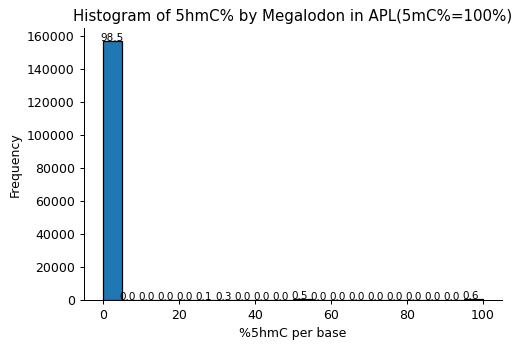

In [117]:
#Draw the 5hmC_freq distribution
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Methylation frequencies distribution
x=df['5hmC_freq']*100
binwidth=5
kwargs = dict(alpha=1, bins=np.arange(0, 100+binwidth, binwidth),  ##Set up the x_axis
              edgecolor='black', align='mid')
plt.figure(figsize=(6,4), dpi=90)
plt.gca().set(title='Histogram of 5hmC% by Megalodon in APL(5mC%=100%)',
              xlabel='%5hmC per base', ylabel='Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
    
n, bins, _ = plt.hist(x=x, **kwargs)
    
k = [round(i/len(x)*100, 1) for i in n]
for i in range(0, len(n)):
    x_pos = bins[i] - 0.5
    y_pos = n[i] + 20
    label = str(k[i]) # relative frequency of each bin
    plt.gca().text(x_pos, y_pos, label, fontsize='small')
        
plt.show()

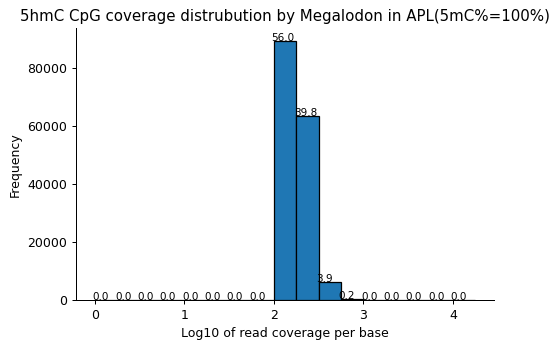

In [118]:
## Draw 5hmC Read coverage distribution
x=df['cov']*100

binwidth=0.25
x= x.astype(float)
x = np.log10(x)
kwargs = dict(alpha=1, bins=np.arange(0, x.max()+binwidth, binwidth),  ##Set up the x_axis
              edgecolor='black', align='mid')
plt.figure(figsize=(6,4), dpi=90)
plt.gca().set(title='5hmC CpG coverage distrubution by Megalodon in APL(5mC%=100%)',
              xlabel='Log10 of read coverage per base',
              ylabel='Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

n, bins, _ = plt.hist(x, **kwargs)
    
k = [round(i/len(x)*100, 1) for i in n]
for i in range(0, len(n)):
    x_pos = bins[i] - binwidth/10
    y_pos = n[i] + 40 ## Determine percentage position
    label = str(k[i]) # relative frequency of each bin
    plt.gca().text(x_pos, y_pos, label, fontsize='small')
        
plt.show()

In [119]:
#For a specific site in a read, label the site as 5mC (cut-off > 0.8) or non_5mC (cut_off < 0.2)
class SiteStats:
    def __init__(self, chrom, strand, start, end):
        self._chrom = chrom
        self._strand = strand
        self._start = start
        self._end = end
        
        self.coverage = 0
        self.methyl = 0
        self.unmethyl = 0

cpgDict = dict()  

with open('/fastscratch/c-panz/APL/APL.5mC_100.Megalodon.per_read.bed') as rf:
    for line in rf:
        record = line.strip().split("\t")
        chrom = record[0]
        start = int(record[1])
        end = int(record[2]) 
        strand=record[4]
#        hydroxymethyl_prob = float(record[5])
        methyl_prob = float(record[6]) 
#        unmethyl_prob=float(record[7])

        if strand not in ['-', '+']:
            raise Exception(f'The file can not recognized strand-info, please check it')    
                 
        site_key = (chrom, start, end, strand)
        if site_key not in cpgDict:
            cpgDict[site_key] = SiteStats(chrom, strand, start, end)
            
        if methyl_prob > threshold: ##Count hydroxymethylated reads
            cpgDict[site_key].methyl += 1
            cpgDict[site_key].coverage += 1
        elif methyl_prob < 1-threshold:  ##Count unmethylated reads
            cpgDict[site_key].unmethyl += 1
            cpgDict[site_key].coverage += 1
        else:  ## Neglect other cases
            continue   
    
sorted_keys = sorted(list(cpgDict.keys()), key = lambda x: x)
with open('/fastscratch/c-panz/APL/APL.5mC_100.Megalodon.5mC.per_site.bed', 'w') as result:
        result.write('\t'.join(["chrom", "start", "end", "strand", 
                                "5mC_cov", "non_5mC_cov", "cov", 
                                "5mC_freq", "non_5mC_freq"]) + '\n')
        for key in sorted_keys: 
            cpg_state = cpgDict[key]
            assert(cpg_state.coverage == (cpg_state.methyl + cpg_state.unmethyl))
            if cpg_state.coverage > 0:
                f_methyl = float(cpg_state.methyl) / cpg_state.coverage
                f_unmethyl = float(cpg_state.unmethyl) / cpg_state.coverage

                result.write("%s\t%s\t%s\t%s\t%d\t%d\t%d\t%.3f\t%.3f\n" % (cpg_state._chrom, cpg_state._start, cpg_state._end, cpg_state._strand, 
                                                                           cpg_state.methyl, cpg_state.unmethyl,
                                                                           cpg_state.coverage, f_methyl, f_unmethyl))

In [120]:
df = pd.read_csv('/fastscratch/c-panz/APL/APL.5mC_100.Megalodon.5mC.per_site.bed', sep = '\t')
df

,chrom,start,end,strand,5mC_cov,non_5mC_cov,cov,5mC_freq,non_5mC_freq
0,chr1,51797,51798,-,2,0,2,1.000,0.000
1,chr1,91060,91061,-,1,0,1,1.000,0.000
2,chr1,119691,119692,-,3,0,3,1.000,0.000
3,chr1,137336,137337,-,2,0,2,1.000,0.000
4,chr1,137956,137957,-,2,0,2,1.000,0.000
...,...,...,...,...,...,...,...,...,...
157808,chrY,56743952,56743953,-,50,3,53,0.943,0.057
157809,chrY,56754634,56754635,-,39,24,63,0.619,0.381
157810,chrY,56768390,56768391,-,95,7,102,0.931,0.069
157811,chrY,56882525,56882526,-,0,2,2,0.000,1.000


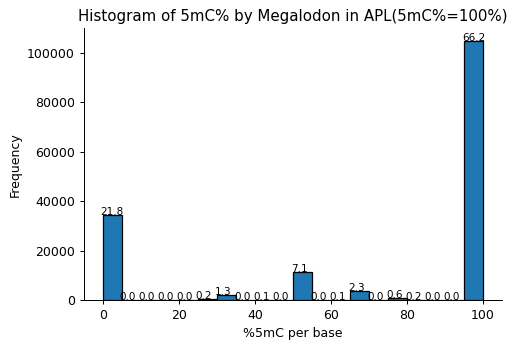

In [109]:
#Draw the 5mC_freq distribution
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Methylation frequencies distribution
x=df['5mC_freq']*100
binwidth=5
kwargs = dict(alpha=1, bins=np.arange(0, 100+binwidth, binwidth),  ##Set up the x_axis
              edgecolor='black', align='mid')
plt.figure(figsize=(6,4), dpi=90)
plt.gca().set(title='Histogram of 5mC% by Megalodon in APL(5mC%=100%)',
              xlabel='%5mC per base', ylabel='Frequency')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
    
n, bins, _ = plt.hist(x=x, **kwargs)
    
k = [round(i/len(x)*100, 1) for i in n]
for i in range(0, len(n)):
    x_pos = bins[i] - 0.5
    y_pos = n[i] + 20
    label = str(k[i]) # relative frequency of each bin
    plt.gca().text(x_pos, y_pos, label, fontsize='small')
        
plt.show()

In [6]:
df.to_csv(os.path.join(input_dir,'APL.mlml.addstrand.bscov.oxbscov.5hmC_rank.bed'), header = True, sep='\t')

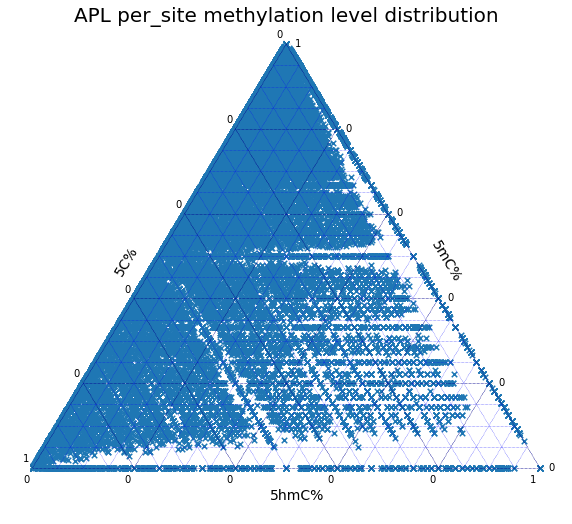

In [12]:
# Set up the figure.
fig, tax = ternary.figure(scale=1)
fig.set_size_inches(10, 9)

#Plot points(marker pattern, size)
tax.scatter(df[['5hmC%', '5mC%', '5C%']].values, marker='x', s=30)

#Axis labels
fontsize = 14
offset = 0.08
tax.left_axis_label("5C%", fontsize=fontsize, offset=offset) #Z
tax.right_axis_label("5mC%", fontsize=fontsize, offset=offset) #Y
tax.bottom_axis_label("5hmC%", fontsize=fontsize, offset=-offset) #X
tax.set_title("APL per_site methylation level distribution", fontsize=20)

# Decoration.
tax.gridlines(color="black", multiple=0.2)
tax.gridlines(color="blue", multiple=0.05, linewidth=0.5)
# Set ticks
tax.ticks(axis='lbr', linewidth=0.1, multiple=0.2)
# Remove default Matplotlib Axes
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()

#tax.savefig(filename=os.path.join(input_dir, 'APL.BSseq.persite'), 
#            dpi=200, bbox_inches='tight', pad_inches=0.0, facecolor='w', transparent=False)

tax.show()

In [9]:
#Ternary Plotting
#Package: python-ternary: https://github.com/marcharper/python-ternary
#https://colab.research.google.com/github/agile-geoscience/xlines/blob/master/notebooks/12_Ternary_diagrams.ipynb
import ternary
def get_ternary_plotting(input_file, species, method):
    points = []
    with open(input_file) as result:
        next(result)
        for line in result:
            record = line.strip().split("\t")
            x = float(record[4]) * 100 #5hmc
            y = float(record[5]) * 100 #5mC
            z = float(record[6]) * 100 #5C
            points.append((x,y,z))    
     
    # Scatter Plot
    figure, tax = ternary.figure(scale=100)
    figure.set_size_inches(4, 4)
    # Plot a few different styles with a legend
    tax.scatter(points, marker='+', s=0.6)

    fontsize = 5
    offset = 0.08
    tax.set_title("{} CpG Scatter Plot by {}".format(species, method), fontsize = fontsize * 1.2)
    tax.left_axis_label("unmethyl_freq%", fontsize = fontsize, offset = offset) #Z
    tax.right_axis_label("methyl_freq%", fontsize = fontsize, offset = offset) #Y
    tax.bottom_axis_label("hydroxymethyl_freq%", fontsize = fontsize, offset = -offset) #X

    tax.boundary(linewidth = 0.3)
    tax.gridlines(multiple = 5, color="grey", linewidth=0.2)
    tax.ticks(axis='lbr', linewidth=0.1, multiple=10, fontsize = fontsize)

    tax.clear_matplotlib_ticks()
    tax.get_axes().axis('off')
    
    filename = 'ternary_plotting_{}_{}'.format(species, method)     
#    tax.savefig(filename=os.path.join(output_dir, filename), dpi=200, bbox_inches='tight', pad_inches=0.0, facecolor='w', transparent=False)
    tax.show()

[(0.5698141467683, 98.85403083944591, 0.57615501378579),
 (0.8270800062775999, 96.31326009523292, 2.85965989848947),
 (0.027359890745749998, 99.86280320808056, 0.10983690117367),
 (0.009515651837324508, 99.943500063044, 0.04698428511867),
 (0.009128346362570587, 99.95893585250761, 0.031935801129809996),
 (1.3990072597902, 89.19322015033416, 9.407772589875641),
 (0.05091812342988, 99.74217313174658, 0.20690874482352997),
 (1.14853117547203, 95.47469140408175, 3.37677742044623),
 (0.013712664034930001, 99.96079430625873, 0.02549302970632),
 (4.92444542765992, 92.35627601570123, 2.71927855663886),
 (0.029838192025279996, 99.85323925015116, 0.11692255782354999),
 (0.11931260685463001, 99.54639525116909, 0.33429214197628),
 (0.017594606476499998, 99.9282528143708, 0.05415257915268),
 (0.8660724403105899, 96.72777193664682, 2.4061556230425802),
 (0.026941392880720002, 99.93205097664368, 0.0410076304756),
 (3.34871272965169, 0.94232352445309, 95.7089637458952),
 (0.012206171624100001, 99.9475

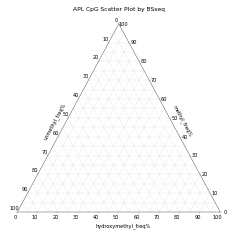

In [10]:
##Ternary Plotting for APL 5hmC/5mC/5C level
#input_file = os.path.join(input_dir, 'APL.mlml.addstrand.bscov.oxbscov.selected.bed')
input_file = os.path.join(input_dir, 'APL.prob.test.bed')
get_ternary_plotting(input_file = input_file, species = 'APL', method = 'BSseq')

In [3]:
APL_5hmC=pd.read_csv(os.path.join(input_dir, 'APL.5hmC.per_read_modified_base_calls.prob.sorted.bed'),
                     names = ['chr','start','read_id','strand','mod_prob','can_prob','mod_state'], sep='\t')
APL_5hmC

,chr,start,read_id,strand,mod_prob,can_prob,mod_state
0,chr1,10469,c12dc98b-4382-4762-853d-b3948eab565e,-,0.005698,0.005762,h
1,chr1,10471,c12dc98b-4382-4762-853d-b3948eab565e,-,0.008271,0.028597,h
2,chr1,10484,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000274,0.001098,h
3,chr1,10489,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000095,0.000470,h
4,chr1,10493,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000091,0.000319,h
...,...,...,...,...,...,...,...
72432591,chrY,56887581,44f84789-5c7e-4f79-bd0e-0e13f11d2536,+,0.021479,0.972800,h
72432592,chrY,56887582,a5edfd66-8ba8-4c66-aa9f-d4458684c151,-,0.329859,0.337590,h
72432593,chrY,56887700,0a2e8d56-b369-4b8b-889f-156c41c7df31,+,0.024644,0.972294,h
72432594,chrY,56887700,44f84789-5c7e-4f79-bd0e-0e13f11d2536,+,0.047172,0.061457,h


In [4]:
APL_5hmC['start'].value_counts()

143215490    529
143215387    526
143215361    523
143215351    520
143216351    520
            ... 
50981816       1
63566779       1
168414140      1
38388669       1
12589059       1
Name: start, Length: 35788681, dtype: int64

In [6]:
APL_5mC=pd.read_csv(os.path.join(input_dir, 'APL.5mC.per_read_modified_base_calls.prob.sorted.bed'),
                     names = ['chr','start','read_id','strand','mod_prob','can_prob','mod_state'], sep='\t')
APL_5mC['start'].value_counts()

143215490    529
143215387    526
143215361    523
143215351    520
143216351    520
            ... 
50981816       1
63566779       1
168414140      1
38388669       1
12589059       1
Name: start, Length: 35788681, dtype: int64

In [45]:
APL_5hmC_chr1=APL_5hmC.loc[APL['chr'] =='chr1']
APL_5hmC_chr1

,chr,start,read_id,strand,mod_prob,can_prob,mod_state
0,chr1,10469,c12dc98b-4382-4762-853d-b3948eab565e,-,0.005698,0.005762,h
1,chr1,10471,c12dc98b-4382-4762-853d-b3948eab565e,-,0.008271,0.028597,h
2,chr1,10484,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000274,0.001098,h
3,chr1,10489,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000095,0.000470,h
4,chr1,10493,c12dc98b-4382-4762-853d-b3948eab565e,-,0.000091,0.000319,h
...,...,...,...,...,...,...,...
13297069,chr11,129307785,b65e34db-c3de-462b-9fbb-db4e84ab4da3,+,0.000100,0.000510,h
13297070,chr11,129307785,f8d01fc2-3592-4b35-a703-7e0953fe2249,+,0.001639,0.001104,h
13297071,chr11,129307786,c6a20ef3-1648-4ec6-b827-b0900dbd8b41,-,0.001063,0.005149,h
13297072,chr11,129307821,63e6f713-ad57-4ead-aff4-43e0edb41590,+,0.163125,0.231898,h


In [57]:
APL_5hmC_chr1['start'].value_counts()

143215490    529
143215387    526
143215361    523
143216351    520
143215351    520
            ... 
16944157       1
64414580       1
16952345       1
113439762      1
69061790       1
Name: start, Length: 7018940, dtype: int64

In [59]:
test=APL_5hmC_chr1.loc[((APL_5hmC_chr1['chr'] =='chr1')&(APL_5hmC_chr1['start']==143215490))]
test

,chr,start,read_id,strand,mod_prob,can_prob,mod_state
3677886,chr1,143215490,00348bb0-9013-4f1d-b6ab-7bde14147f6f,-,0.009944,0.003210,h
3677887,chr1,143215490,009a40ef-3b1d-4fcd-ba3c-5b5698f14f47,-,0.000721,0.002194,h
3677888,chr1,143215490,009c833a-933f-4b73-a0b7-25005318d30a,-,0.052122,0.026455,h
3677889,chr1,143215490,00e6855d-128b-4a51-aa7f-758b9947870b,-,0.032195,0.029538,h
3677890,chr1,143215490,01477ca8-6ec2-4e93-87b2-99476fc30190,-,0.000614,0.001347,h
...,...,...,...,...,...,...,...
3678410,chr1,143215490,fd649c34-bcef-42b9-9e3e-e96d39b1169c,-,0.000449,0.001254,h
3678411,chr1,143215490,fde4ac0b-f5e3-40b7-8d5f-580eca749519,-,0.000392,0.001420,h
3678412,chr1,143215490,fe0bc37c-def1-47d0-a9c5-57a96da37c01,-,0.001294,0.002452,h
3678413,chr1,143215490,ff2f8475-5a93-4bf9-bbd4-66f0a52496c6,-,0.008160,0.006359,h


In [18]:
input_dir='/fastscratch/c-panz/APL'
test_5hmC=pd.read_csv(os.path.join(input_dir, 'APL.5hmC.bed'),
                      names = ['chr','start','read_id','strand','mod_prob','can_prob','mod_state'], sep='\t')
test_5mC=pd.read_csv(os.path.join(input_dir, 'APL.5mC.bed'),
                     names = ['chr','start','read_id','strand','mod_prob','can_prob','mod_state'], sep='\t')
test_5hmC.columns=['chr','start','read_id','strand','5hmC_prob','5C_prob','mod_state1']
test_5mC.columns=['chr','start','read_id','strand','5mC_prob','5C_prob','mod_state2']
test=pd.merge(test_5hmC, test_5mC, how="inner", on=['chr','start','read_id','strand','5C_prob'])

KeyboardInterrupt: 

In [7]:
test = APL_5hmC['start'].value_counts()
test

143215490    529
143215387    526
143215361    523
143215351    520
143216351    520
            ... 
50981816       1
63566779       1
168414140      1
38388669       1
12589059       1
Name: start, Length: 35788681, dtype: int64

In [ ]:
#Read coverage distribution
def get_coverage(x, species, method, output_path, binwidth=0.25): ##Set up the width for each block
    x= x.astype(float)
    x = np.log10(x)
    kwargs = dict(alpha=1, bins=np.arange(0, x.max()+binwidth, binwidth),  ##Set up the x_axis
              edgecolor='black', align='mid')
    plt.figure(figsize=(6,4), dpi=90)
    plt.gca().set(title='CpG coverage distrubution in {} by {}'.format(species, method), 
              xlabel='Log10 of read coverage per base',
              ylabel='Frequency')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    n, bins, _ = plt.hist(x, **kwargs)
    
    k = [round(i/len(x)*100, 1) for i in n]
    for i in range(0, len(n)):
        x_pos = bins[i] - binwidth/10
        y_pos = n[i] + 40 ## Determine percentage position
        label = str(k[i]) # relative frequency of each bin
        plt.gca().text(x_pos, y_pos, label, fontsize='small')
        
    filename = 'CpGcoverage_{}_{}'.format(species, method) + '.png'     
    plt.savefig(fname=os.path.join(output_path, filename), dpi=300, bbox_inches='tight', pad_inches=0.0, facecolor='w', transparent=False)
    plt.show()

In [12]:
#5hmC_freq plotting
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Methylation frequencies distribution
def get_methyl_distribution(x, category, species, method, binwidth=5):
    kwargs = dict(alpha=1, bins=np.arange(0, 100+binwidth, binwidth),  ##Set up the x_axis
              edgecolor='black', align='mid')
    plt.figure(figsize=(6,4), dpi=90)
    plt.gca().set(title='Histogram of {}\nin {} by {}'.format(category, species, method), 
              xlabel='%{} per base'.format(category),
              ylabel='Frequency')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    n, bins, _ = plt.hist(x=x, **kwargs)
    
    k = [round(i/len(x)*100, 1) for i in n]
    for i in range(0, len(n)):
        x_pos = bins[i] - 0.5
        y_pos = n[i] + 20
        label = str(k[i]) # relative frequency of each bin
        plt.gca().text(x_pos, y_pos, label, fontsize='small')
        
    fig_name = '{}_{}_{}'.format(category, species, method) + '.png'   
#    plt.savefig(fname=os.path.join(output_path, fig_name), dpi=200, bbox_inches='tight', pad_inches=0.0, facecolor='w', transparent=False)
    plt.show()   

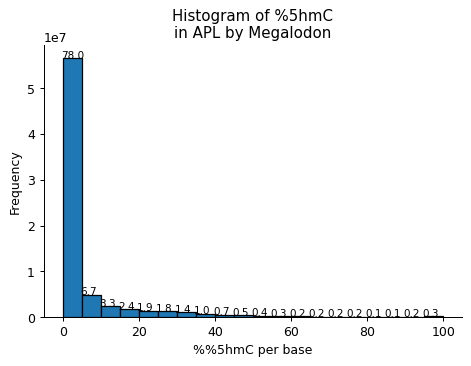

In [14]:
#DeepSignal
get_methyl_distribution(APL_5hmC['mod_prob']*100, category = "%5hmC", species = "APL", method="Megalodon")

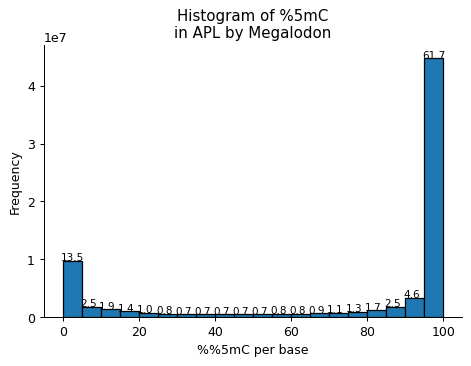

In [15]:
get_methyl_distribution(APL_5mC['mod_prob']*100, category = "%5mC", species = "APL", method="Megalodon")

In [35]:
APL_BSseq=pd.read_csv(os.path.join(input_dir, 'APL.mlml.addstrand.bscov.oxbscov.selected.bed'),
                     names = ['chr','start','5mC_level','5hmC_level','5C_level','number_of_conflict','strand','BS_cov','oxBS_cov'],
                     sep='\t')
APL_BSseq

,chr,start,end,5mC_level,5hmC_level,5C_level,number_of_conflict,strand,BS_cov,oxBS_cov
0,chr1,10542,10543,1.00,0.00,0.00,0,+,2,1
1,chr1,10563,10564,0.75,0.00,0.25,0,+,3,1
2,chr1,10571,10572,1.00,0.00,0.00,0,+,3,1
3,chr1,10577,10578,1.00,0.00,0.00,0,+,3,2
4,chr1,10579,10580,1.00,0.00,0.00,0,+,3,2
...,...,...,...,...,...,...,...,...,...,...
44245797,chrY,56887100,56887101,0.75,0.25,0.00,0,-,1,4
44245798,chrY,56887580,56887581,1.00,0.00,0.00,0,+,2,1
44245799,chrY,56887582,56887583,0.00,0.00,1.00,0,+,2,1
44245800,chrY,56887701,56887702,1.00,0.00,0.00,0,+,1,1


In [16]:
#Ternary Plotting
#Package: python-ternary: https://github.com/marcharper/python-ternary
#https://colab.research.google.com/github/agile-geoscience/xlines/blob/master/notebooks/12_Ternary_diagrams.ipynb
import ternary
def get_ternary_plotting(input_file, species, method):
    points = []
    with open(input_file) as result:
        next(result)
        for line in result:
            record = line.strip().split("\t")
            x = float(record[5]) * 100 #5hmc
            y = float(record[4]) * 100 #5mC
            z = float(record[6]) * 100 #5C
            points.append((x,y,z))    
     
    # Scatter Plot
    figure, tax = ternary.figure(scale=100)
    figure.set_size_inches(4, 4)
    # Plot a few different styles with a legend
    tax.scatter(points, marker='+', s=0.6)

    fontsize = 5
    offset = 0.08
    tax.set_title("{} CpG Scatter Plot by {}".format(species, method), fontsize = fontsize * 1.2)
    tax.left_axis_label("unmethyl_freq%", fontsize = fontsize, offset = offset) #Z
    tax.right_axis_label("methyl_freq%", fontsize = fontsize, offset = offset) #Y
    tax.bottom_axis_label("hydroxymethyl_freq%", fontsize = fontsize, offset = -offset) #X

    tax.boundary(linewidth = 0.3)
    tax.gridlines(multiple = 5, color="grey", linewidth=0.2)
    tax.ticks(axis='lbr', linewidth=0.1, multiple=10, fontsize = fontsize)

    tax.clear_matplotlib_ticks()
    tax.get_axes().axis('off')
    
    filename = 'ternary_plotting_{}_{}'.format(species, method)     
#    tax.savefig(filename=os.path.join(output_dir, filename), dpi=200, bbox_inches='tight', pad_inches=0.0, facecolor='w', transparent=False)
    tax.show()

In [17]:
##Ternary Plotting for APL 5hmC/5mC/5C level
#input_file = os.path.join(input_dir, 'APL.mlml.addstrand.bscov.oxbscov.selected.bed')
input_dir='/pod/2/li-lab/Ziwei/Nanopore/results/APL_megalodon2.3.3_guppy5.0.11'
input_file = os.path.join(input_dir, 'test.bed')
get_ternary_plotting(input_file = input_file, species = 'APL', method = 'BSseq')

FileNotFoundError: [Errno 2] No such file or directory: '/pod/2/li-lab/Ziwei/Nanopore/results/APL_megalodon2.3.3_guppy5.0.11/test.bed'

In [ ]:
with open(input_file) as result:
    next(result)
    for line in result:
        record = line.strip().split("\t")
        print(record)